# 📘 Assessment: Timing Programs, Counting Operations, and Complexity Analysis
MIT 6.100L (Inspired) – Introduction to Computer Science and Programming Using Python  
Eldo-Hub – Data Science Students  

---
## 🎯 Learning Goals
- Reinforce concepts from **Lecture 21** (Timing Programs, Counting Operations)
- Apply theory from **Lecture 22** (Big-O, Big-Theta, Order of Growth)
- Practice analyzing and comparing algorithm performance
- Build intuition for how runtime and complexity grow with input size

---
## 📂 Instructions
- Complete each question below inside this notebook.
- Use **code cells** for programming tasks.
- Use **markdown cells** for explanations.
- Submit your completed notebook as your assessment.

---

## Part 1: Timing Programs (Lecture 21)

### Q1. Timing Functions
Write two functions:
1. A function that computes the sum of integers from 1 to n using a **loop**.
2. A function that computes the sum of integers from 1 to n using the **formula** (n(n+1)/2).

Use Python's `time` module to measure execution time for increasing values of n (`[10**3, 10**5, 10**7]`).

**Task:** Compare the timing results and explain why they differ.

In [1]:
import time

def loop_sum(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

def formula_sum(n):
    return n * (n + 1) // 2

sizes = [10**3, 10**5, 10**7]

for size in sizes:
    start = time.time()
    loop_sum(size)
    loop_time = time.time() - start

    start = time.time()
    formula_sum(size)
    formula_time = time.time() - start

    print(f"n = {size:,}")
    print(f"  Loop sum time:     {loop_time:.6f} seconds")
    print(f"  Formula sum time:  {formula_time:.6f} seconds\n")


n = 1,000
  Loop sum time:     0.000047 seconds
  Formula sum time:  0.000011 seconds

n = 100,000
  Loop sum time:     0.005564 seconds
  Formula sum time:  0.000003 seconds

n = 10,000,000
  Loop sum time:     0.587255 seconds
  Formula sum time:  0.000005 seconds



### Q2. Counting Operations
Modify your loop-based sum function to count how many operations it performs for input size `n`.

**Task:** Express its growth in terms of Big-O notation.

In [3]:
def loop_sum_with_count(n):
    total = 0
    operations = 0

    for i in range(1, n+1):
        total += i
        operations += 1   # sumin the addition p loop

    return total, operations

sizes = [10**3, 10**5, 10**7]

for size in sizes:
    _, opppps = loop_sum_with_count(size)
    print(f"n = {size:,} → operations = {opppps}")


n = 1,000 → operations = 1000
n = 100,000 → operations = 100000
n = 10,000,000 → operations = 10000000


## Part 2: Complexity Analysis (Lecture 22)

### Q3. Linear vs Quadratic Growth
Consider the following two functions:
```python
def linear_sum(L):
    total = 0
    for x in L:
        total += x
    return total

def quadratic_pairs(L):
    count = 0
    for i in L:
        for j in L:
            count += i*j
    return count
```

**Task:**
1. Count the number of operations for both functions.
2. Determine their order of growth (Big-O and Big-Theta).
3. Plot their runtime growth for increasing input sizes.

### Q4. Searching Algorithms
1. Implement **linear search** and **binary search**.
2. Count the number of operations each requires for lists of size `[10**3, 10**4, 10**5, 10**6]`.
3. Compare against Python's built-in `in` operator.

**Task:** Plot how the number of operations grows with input size and explain the difference between Θ(n) and Θ(log n).

## Part 3: Applied Analysis

### Q5. Matrix Multiplication
1. Write a function to multiply two n×n matrices.
2. Count the number of operations.
3. Express the complexity in Big-O and Big-Theta notation.

**Hint:** Nested loops matter!

n = 100
  Linear ops = 100, time = 0.000028s
  Quadratic ops = 10000, time = 0.001518s

n = 500
  Linear ops = 500, time = 0.000051s
  Quadratic ops = 250000, time = 0.043595s

n = 1,000
  Linear ops = 1000, time = 0.000106s
  Quadratic ops = 1000000, time = 0.174974s

n = 2,000
  Linear ops = 2000, time = 0.000225s
  Quadratic ops = 4000000, time = 0.607211s



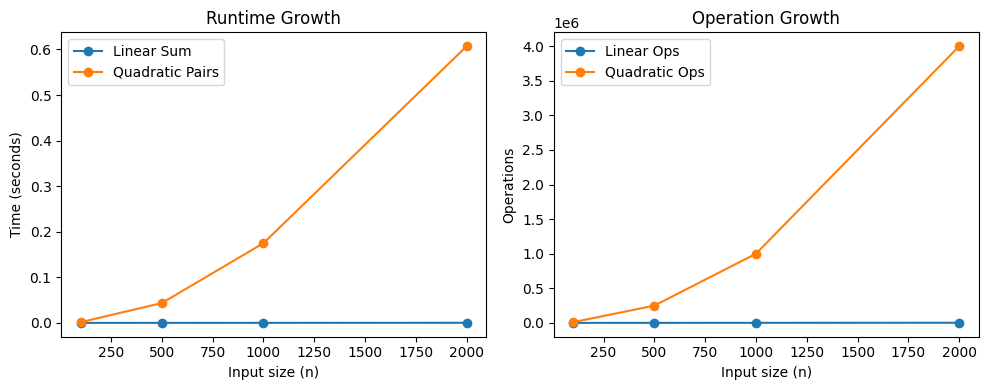

In [4]:
import time
import matplotlib.pyplot as plt

def linear_sum(L):
    total = 0
    operations = 0
    for x in L:
        total += x
        operations += 1
    return total, operations

def quadratic_pairs(L):
    count = 0
    operations = 0
    for i in L:
        for j in L:
            count += i * j
            operations += 1
    return count, operations

sizes = [100, 500, 1000, 2000]  # manageable for plotting
linear_times, quadratic_times = [], []
linear_ops, quadratic_ops = [], []

for n in sizes:
    L = list(range(n))

    start = time.time()
    _, ops1 = linear_sum(L)
    linear_times.append(time.time() - start)
    linear_ops.append(ops1)

    start = time.time()
    _, ops2 = quadratic_pairs(L)
    quadratic_times.append(time.time() - start)
    quadratic_ops.append(ops2)

    print(f"n = {n:,}")
    print(f"  Linear ops = {ops1}, time = {linear_times[-1]:.6f}s")
    print(f"  Quadratic ops = {ops2}, time = {quadratic_times[-1]:.6f}s\n")

# Plot runtimes
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(sizes, linear_times, marker='o', label="Linear Sum")
plt.plot(sizes, quadratic_times, marker='o', label="Quadratic Pairs")
plt.xlabel("Input size (n)")
plt.ylabel("Time (seconds)")
plt.title("Runtime Growth")
plt.legend()

# Plot operations
plt.subplot(1,2,2)
plt.plot(sizes, linear_ops, marker='o', label="Linear Ops")
plt.plot(sizes, quadratic_ops, marker='o', label="Quadratic Ops")
plt.xlabel("Input size (n)")
plt.ylabel("Operations")
plt.title("Operation Growth")
plt.legend()

plt.tight_layout()
plt.show()


### Q6. Best, Worst, and Average Case
Modify your **linear search** to count operations separately for:
- Best case (element is first)
- Worst case (element is last or missing)
- Average case (element is in the middle)

**Task:** Report the operation counts and classify their Big-O/Theta behavior.

In [5]:
def linear_search(L, target):
    operations = 0
    for i, val in enumerate(L):
        operations += 1  # comparison
        if val == target:
            return i, operations
    return -1, operations  # not found

# Test sizes
sizes = [10**3, 10**4, 10**5]

for n in sizes:
    L = list(range(n))

    # Best case: element is first
    _, best_ops = linear_search(L, L[0])

    # Average case: element in middle
    _, avg_ops = linear_search(L, L[n//2])

    # Worst case: element is last
    _, worst_ops = linear_search(L, L[-1])

    # Missing case: not in list
    _, missing_ops = linear_search(L, -1)

    print(f"n = {n:,}")
    print(f"  Best case ops     = {best_ops}")
    print(f"  Average case ops  = {avg_ops}")
    print(f"  Worst case ops    = {worst_ops}")
    print(f"  Missing case ops  = {missing_ops}\n")


n = 1,000
  Best case ops     = 1
  Average case ops  = 501
  Worst case ops    = 1000
  Missing case ops  = 1000

n = 10,000
  Best case ops     = 1
  Average case ops  = 5001
  Worst case ops    = 10000
  Missing case ops  = 10000

n = 100,000
  Best case ops     = 1
  Average case ops  = 50001
  Worst case ops    = 100000
  Missing case ops  = 100000



---
## ✅ Submission Checklist
- [ ] Completed all code implementations
- [ ] Counted operations where required
- [ ] Classified complexities in Big-O and Big-Theta
- [ ] Plotted growth where asked
- [ ] Explained observations clearly

Great work! 🚀 This assessment prepares you for **Lecture 24**.